In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
train = pd.read_csv('data/train.csv')
train.head(50)

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression
5,V6VSDJ5I,What are the effects of depression to ones health,Depression
6,9736J4UE,Why is everything so hard to deal with in this...,Depression
7,AY8L479Y,I feel emotionally overwhelmed,Depression
8,OSFJV5EC,How to manage taking alcohol?,Alcohol
9,U4SGUGGM,Is heaven open for us who smoke bhang?,Drugs


In [21]:
x_value = train['text']
y_value = train['label']#.replace({'Depression': 0, 'Drugs': 1, 'Suicide': 2, 'Alcohol': 4})
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size=0.25)

In [11]:
#depress = x_train[x_train['label'] == 'Depression']
#drugs = x_train[x_train['label'] == 'Drugs']
#suic = x_train[x_train['label'] == 'Suicide']
#alc = x_train[x_train['label'] == 'Alcohol']

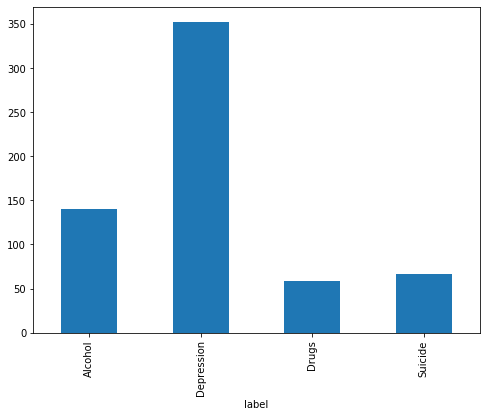

In [12]:
fig = plt.figure(figsize=(8,6))
train.groupby('label').text.count().plot.bar(ylim=0)
plt.show()

In [14]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',\
                        ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(x_train['text']).toarray()
#labels = y_train
features.shape

(462, 72)

In [22]:
vect = CountVectorizer()
x_train_counts = vect.fit_transform(x_train)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
clf = MultinomialNB().fit(x_train_tfidf, y_train)

In [23]:
print(clf.predict(vect.transform(["I feel that it was better I dieAm happy"])))

['Depression']


In [24]:
print(clf.predict_log_proba(vect.transform(["I feel that it was better I dieAm happy"])))

[[-7.33578188e+00 -1.76133209e-03 -7.41367269e+00 -7.59088162e+00]]


In [25]:
print(clf.predict_proba(vect.transform(["I feel that it was better I dieAm happy"])))

[[6.51794078e-04 9.98240218e-01 6.02952167e-04 5.05035608e-04]]


In [31]:
print(clf.predict(vect.transform(["How can someone stop it?"])))

['Alcohol']


In [32]:
print(clf.predict_proba(vect.transform(["How can someone stop it?"])))

[[0.94779111 0.02488184 0.02166894 0.00565811]]


In [39]:
print(clf.predict(vect.transform(["Causes of suicide by youths"])))

['Suicide']


In [40]:
print(clf.predict_proba(vect.transform(["Causes of suicide by youths"])))

[[0.19494214 0.25240664 0.01884591 0.53380531]]


In [45]:
print(clf.predict(vect.transform(["What are the effects of smoking bhang?"])))

['Drugs']


In [46]:
print(clf.predict_proba(vect.transform(["What are the effects of smoking bhang?"])))

[[0.19589638 0.14940968 0.65248128 0.00221266]]


In [49]:
np.count_nonzero(clf.predict(vect.transform(x_test)) == y_test)

120

In [50]:
len(x_test)

154

In [51]:
120/154

0.7792207792207793

In [52]:
np.count_nonzero(clf.predict(vect.transform(x_train)) == y_train)

391

In [53]:
391/len(x_train)

0.8463203463203464